In [1]:
import Bio
from Bio import SeqIO
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord as SR
from Bio.Blast import NCBIXML
from Bio import pairwise2
from Bio.pairwise2 import format_alignment
import numpy as np
import pandas as pd
from pandas import DataFrame as df
import seaborn as sns
import matplotlib.pyplot as plt
import subprocess
import os
# from mothur_py import Mothur
from shutil import copy
import warnings
from Bio import pairwise2
from Bio.pairwise2 import format_alignment
# from ipysankeywidget import SankeyWidget
warnings.filterwarnings("ignore")

In [ ]:
fastq_dict = SeqIO.to_dict(SeqIO.parse("../../analysis/Concatenated/20171103_FAH15473/barcode02/merged.fastq", "fastq"))

In [ ]:
lengths = []
for key in fastq_dict:
    lengths.append(len(fastq_dict[key].seq))
print("The number of reads in this file is", len(fastq_dict))
ax = sns.distplot(lengths, color="k", kde=False, bins=5000)


ax.set(xlim=(250, 3500))
ax.set_title("Reads spread 20171103_FAH15473/barcode02", fontsize=15)
ax.set_xlabel("Length of read", fontsize=13)
ax.set_ylabel("Number of reads", fontsize=13)

plt.show()

In [ ]:
frDNA = fastq_dict.copy()
for key in fastq_dict:
    if len(fastq_dict[key].seq) not in range(2700, 3200):
        del frDNA[key]
print("The number of reads between 2700 and 3200 bp in length is", len(frDNA))
EF1a = fastq_dict.copy()
for key in fastq_dict:
    if len(fastq_dict[key].seq) not in range(900, 1400):
        del EF1a[key]
print("The number of reads between 900 and 1400 bp in length is", len(EF1a))

In [ ]:
# Write the reads defined between the frDNA cutoff into a new fasta file
SeqIO.write(frDNA.values(), "../../analysis/Python_Processing/20171103_FAH15473/barcode02/barcode02_frDNA_clipped.fastq", "fastq")

In [ ]:
# Write the reads defined between the EF1a cutoff into a new fasta file
SeqIO.write(EF1a.values(), "../../analysis/Python_Processing/20171103_FAH15473/barcode02/barcode02_EF1a_clipped.fastq", "fastq")

In [ ]:
frDNA_extract={k: frDNA[k] for k in list(frDNA.keys())[:500]}
EF1a_extract={k: EF1a[k] for k in list(EF1a.keys())[:500]}

In [ ]:
for key in frDNA_extract:
    frDNA_extract[key].annotations = 'frDNA'
for key in EF1a_extract:
    EF1a_extract[key].annotations = 'EF1a'

In [ ]:
combined_extract = {}
combined_extract.update(frDNA_extract)
combined_extract.update(EF1a_extract)
print(len(frDNA_extract))
print(len(EF1a_extract))
print(len(combined_extract))

In [ ]:
SeqIO.write(frDNA_extract.values(), "../../analysis/Python_Processing/20171103_FAH15473/barcode02/barcode02_frDNA_extract_test.fastq", "fastq")
SeqIO.write(EF1a_extract.values(), "../../analysis/Python_Processing/20171103_FAH15473/barcode02/barcode02_EF1a_extract_test.fastq", "fastq")
SeqIO.write(combined_extract.values(), "../../analysis/Python_Processing/20171103_FAH15473/barcode02/barcode02_combined_extract_test.fastq", "fastq")

In [ ]:
frDNA_paf = pd.read_csv("../../analysis/Python_Processing/20171103_FAH15473/barcode02/frDNA_clipped_test.paf", sep='\t', header=None, engine='python')
EF1a_paf = pd.read_csv("../../analysis/Python_Processing/20171103_FAH15473/barcode02/EF1a_clipped_test.paf", sep='\t', header=None, engine='python')
combined_paf = pd.read_csv("../../analysis/Python_Processing/20171103_FAH15473/barcode02/combined_test.paf", sep='\t', header=None, engine='python')

In [ ]:
frDNA_paf.head()

In [ ]:
combined_paf.head()

In [14]:
print("min len of match for frDNA is", frDNA_paf[1].min())
print("min len of match for EF1a is", EF1a_paf[1].min())
print("min len of match for combined is", combined_paf[1].min())

min len of match for frDNA is 2700
min len of match for EF1a is 900
min len of match for combined is 284


In [15]:
print('num matches with unique ids for frDNA is', len(frDNA_paf[0].unique()))
print('num matches with unique ids for EF1a is', len(EF1a_paf[0].unique()))
print('num matches with unique ids for combined is', len(combined_paf[0].unique()))

num matches with unique ids for frDNA is 123026
num matches with unique ids for EF1a is 2124
num matches with unique ids for combined is 143363


Compare above (using minimap2) with BLAST approach
    - BLAST may be too slow on a larger dataset


Check with other alignment programs eg. lastz, BLAT (check for others)



# Testing of full size-clipped files for alignment via minimap2
 - For each of the frDNA_clipped and EF1a_clipped files as created above 
     - Look for the number of unique ids in the resultant file
     - Determine the percentage of reads in this range that match homology given total number of reads in the clipped.fastq file

In [16]:
frDNA_clipped_paf = pd.read_csv("../../analysis/Python_Processing/20171103_FAH15473/barcode02/frDNA_clipped_test.paf", sep='\t', header=None, engine='python')

In [17]:
EF1a_clipped_paf = pd.read_csv("../../analysis/Python_Processing/20171103_FAH15473/barcode02/EF1a_clipped_test.paf", sep='\t', header=None)

In [18]:
print('Total number of matches found for frDNA is', len(frDNA_clipped_paf[0].unique()))
print('Percentage of matches in region =', "{:.3%}".format((len(frDNA_clipped_paf[0].unique())/167054)))

Total number of matches found for frDNA is 123026
Percentage of matches in region = 73.644%


In [19]:
print('Total number of matches found for EF1a is', len(EF1a_clipped_paf[0].unique()))
print('False positive percentage =', "{:.3%}".format((len(EF1a_clipped_paf[0].unique())/192712)))

Total number of matches found for EF1a is 2124
False positive percentage = 1.102%


In [20]:
print('Total number of matches found for the total of reads is', len(combined_paf[0].unique()))
print('Percentage of matches overall =', "{:.3%}".format((len(combined_paf[0].unique())/413127)))

Total number of matches found for the total of reads is 143363
Percentage of matches overall = 34.702%


~~Plot distribution of matching reads as above~~

~~Repeat minimap2 for above to see if fluctuations~~

Explore non-mapping 25%

Scaling - plots saved out, file for statistics (loop over later)

In [21]:
# combined_ids = []
# for key in combined_paf[0].unique():
#     combined_ids.append(key)
combined_dict = SeqIO.to_dict(SeqIO.parse("../../analysis/Concatenated/20171103_FAH15473/barcode02/merged.fastq", "fastq"))
comb_dict = {}
for key in combined_paf[0].unique():
    comb_dict[key] = combined_dict[key]

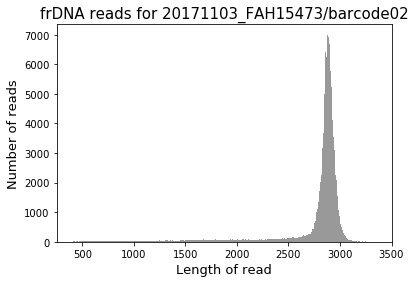

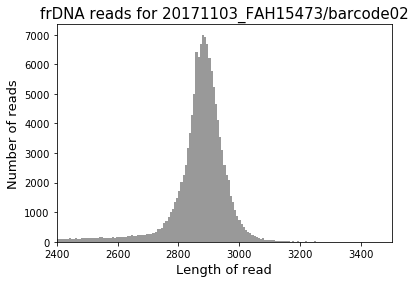

,number of frDNA reads,minimum read length,maximum read length,mean read length,median read length
20171103_FAH15473/barcode02,143363,284,35613,2780,2876


In [22]:
lengths = []
comb_keys = []
for key in comb_dict:
    lengths.append(len(comb_dict[key].seq))
    comb_keys.append(key)

stats_dict = {'number of frDNA reads':len(lengths),'minimum read length':min(lengths),'maximum read length':max(lengths),'mean read length':"{:.0f}".format(np.mean(lengths)),'median read length':"{:.0f}".format(np.median(lengths))}
stats = pd.DataFrame(stats_dict, index=['20171103_FAH15473/barcode02'])
        
              
ax = sns.distplot(lengths, color="k", kde=False, bins=5000)
ax.set(xlim=(250, 3500))
ax.set_title("frDNA reads for 20171103_FAH15473/barcode02", fontsize=15)
ax.set_xlabel("Length of read", fontsize=13)
ax.set_ylabel("Number of reads", fontsize=13)
plt.show()


ax = sns.distplot(lengths, color="k", kde=False, bins=5000)
ax.set(xlim=(2400, 3500))
ax.set_title("frDNA reads for 20171103_FAH15473/barcode02", fontsize=15)
ax.set_xlabel("Length of read", fontsize=13)
ax.set_ylabel("Number of reads", fontsize=13)
plt.show()


display(stats)

In [23]:
fr_dict = SeqIO.to_dict(SeqIO.parse("../../analysis/Python_Processing/20171103_FAH15473/barcode02/barcode02_frDNA_clipped.fastq", 'fastq'))
print(len(fr_dict))

167054


In [27]:
non_dict = {}
for key in fr_dict:
    if key not in frDNA_clipped_paf[0].unique():
        non_dict[key] = fr_dict[key]
print(len(non_dict))

44028


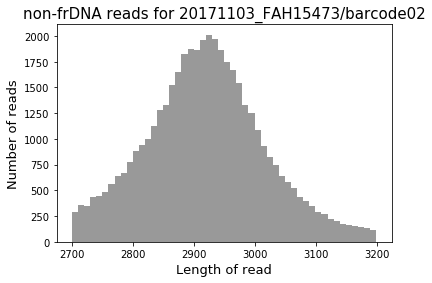

,number of reads,minimum read length,maximum read length,mean read length,median read length
20171103_FAH15473/barcode02,44028,2700,3199,2919,2918


In [28]:
lengths = []
non_keys = []
for key in non_dict:
    lengths.append(len(non_dict[key].seq))
    non_keys.append(key)

non_dict_stats = {'number of reads':len(lengths),'minimum read length':min(lengths),'maximum read length':max(lengths),'mean read length':"{:.0f}".format(np.mean(lengths)),'median read length':"{:.0f}".format(np.median(lengths))}
stats = pd.DataFrame(non_dict_stats, index=['20171103_FAH15473/barcode02'])
        
              
ax = sns.distplot(lengths, color="k", kde=False)
# ax.set(xlim=(250, 3500))
ax.set_title("non-frDNA reads for 20171103_FAH15473/barcode02", fontsize=15)
ax.set_xlabel("Length of read", fontsize=13)
ax.set_ylabel("Number of reads", fontsize=13)
plt.show()
display(stats)

In [47]:
%%writefile ../summary_statistics.py

"""
The goal of this program is to examine the distribution of reads within
each file, and for the files generated after homology analysis.
The program will generate summary statistics for the result of the homology
analysis and save figures illustrating the read distribution for the
frDNA reads
"""

import Bio
from Bio import SeqIO
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord as SR
from Bio.Blast import NCBIXML
import numpy as np
import pandas as pd
from pandas import DataFrame as df
import seaborn as sns
import matplotlib.pyplot as plt
import argparse


WHITE='\033[1;37m'
BLUE='\033[0;34m'
RED='\033[0;31m'
NC='\033[0m'
GREEN='\033[0;32m'

parser = argparse.ArgumentParser(description="""
The goal of this program is to examine the distribution of reads within
each file, and for the files generated after homology analysis.
The program will generate summary statistics for the result of the homology
analysis and save figures illustrating the read distribution for the
frDNA reads
""")
group = parser.add_mutually_exclusive_group()
group.add_argument("--verbose", "-v", "--v", action="store_true")
group.add_argument("--quiet", "-q", "--q", action="store_true")
parser.add_argument("full_file", help="The full, unfiltered file containing all reads for this barcode")
parser.add_argument("input_folder", help="The destination folder within which the .paf files are generated")
parser.add_argument("output_folder", help="The destination folder for any outputs from this script - including summary statistics file and plots")
args = parser.parse_args()

output_folder = args.output_folder.rsplit('/', 1)[-2]
input_folder = args.input_folder.rsplit('/', 1)[-2]
if args.verbose:
    print('\033[0;31m' + "Input folder is " + input_folder + '\033[1;37m')
    print('\033[0;31m' + "Output folder is " + output_folder + '\033[1;37m')
    print('\033[0;34m' + "Loading " + args.full_file + '\033[1;37m')

# Load the full file containing all reads for this barcode
full_file_dict = SeqIO.to_dict(SeqIO.parse(args.full_file, "fastq"))

if args.verbose:
    print('\033[0;34m' + "Loaded " + args.full_file + '\033[1;37m')

# Extract the information about the lengths of the sequence for each read in this barcode
full_lengths = []
for key in full_file_dict:
    full_lengths.append(len(full_file_dict[key].seq))
full_lengths_len = len(full_file_dict)

# Plot the spread of read lengths for this barcode
    # Expect to see two peaks - one for EF1a and one for frDNA
ax = sns.distplot(full_lengths, color="k", kde=False, bins=5000)
ax.set(xlim=(250, 3500))
ax.set_title("Read spread for %s" % '/'.join(args.full_file.rsplit('/')[-3:-1]), fontsize=15)
ax.set_xlabel("Length of read", fontsize=13)
ax.set_ylabel("Number of reads", fontsize=13)
figure1 = ax.get_figure()
# Save this figure out
figure1.savefig('/'.join([output_folder, 'full_read_spread.png']))
if args.verbose:
    print('\033[0;32m' + "Full spread image file saved to " + '/'.join([output_folder, 'full_read_spread.png']) + '\033[1;37m')
    print('\033[0;34m' + "Loading " + input_folder+"/combined_test.paf" + '\033[1;37m')

# Import the PAF file resulting from the minimap2 homology filtering
full_paf = pd.read_csv(input_folder+"/combined_test.paf", sep='\t', header=None, engine='python')
if args.verbose:
    print('\033[0;34m' + "Loaded " + input_folder+"/combined_test.paf" + '\033[1;37m')
# Determine all the read ids present within the homology-filtered dataset
# Then, create a dictionary extracting all the information from the full read file, but ONLY for reads present within the homology-filtered data
full_dict = {}
for key in full_paf[0].unique():
    full_dict[key] = full_file_dict[key]

# For each key in the homology-filtered dictionary, extract the sequence length and key
full_paf_lengths = []
full_keys = []
for key in full_dict:
    full_paf_lengths.append(len(full_dict[key].seq))
    full_keys.append(key)

    
    
# Extract the qscores
if args.verbose:
    print('\033[0;34m' + "Loading " + 'Basecalled/'+'/'.join(args.full_file.rsplit('/')[-3:-1])+'/sequencing_summary.txt' + '\033[1;37m')
summ_stats_csv = pd.read_csv('Basecalled/'+'/'.join(args.full_file.rsplit('/')[-3:-1])+'/sequencing_summary.txt', sep='\t', header=None, names=['filename', 'read_id', 'run_id', 'batch_id', 'channel', 'mux', 'start_time', 'duration', 'num_events', 'passes_filtering', 'template_start', 'num_events_template', 'template_duration', 'sequence_length_template', 'mean_qscore_template', 'strand_score_template', 'median_template', 'mad_template'], engine='python')
summ_stats_csv = pd.DataFrame(summ_stats_csv[1:])
summary_list = []
for column, row in summ_stats_csv.iterrows():
    if row['read_id'] in full_keys:
        summary_list.append([row['read_id'], row['mean_qscore_template']])
summary_frame = pd.DataFrame(summary_list)
if args.verbose:
    print('\033[0;34m' + "Finished with " + 'Basecalled/'+'/'.join(args.full_file.rsplit('/')[-3:-1])+'/sequencing_summary.txt' + '\033[1;37m')
    
# Create a dictionary containing the statistics for the filtered dataset
    # Total no. frDNA reads, Min. read length, Max. read length, Mean read length, Median read length, Quality score
stats_dict = {'number of frDNA reads':len(full_paf_lengths),'minimum read length':min(full_paf_lengths),'maximum read length':max(full_paf_lengths),'mean read length':"{:.0f}".format(np.mean(full_paf_lengths)),'median read length':"{:.0f}".format(np.median(full_paf_lengths)), 'min_qscore':"{:.2f}".format(min(summary_frame[1].astype(float))), 'max_qscore':"{:.2f}".format(max(summary_frame[1].astype(float))), 'mean_qscore':"{:.2f}".format(np.mean(summary_frame[1].astype(float))), 'median_qscore':"{:.2f}".format(np.median(summary_frame[1].astype(float)))}
stats = pd.DataFrame(stats_dict, index=['%s' % '/'.join(args.full_file.rsplit('/')[-3:-1])])
print(stats.head())     
              
ax = sns.distplot(full_paf_lengths, color="k", kde=False, bins=5000)
ax.set(xlim=(250, 3500))
ax.set_title("frDNA reads for %s" % '/'.join(args.full_file.rsplit('/')[-3:-1]), fontsize=15)
ax.set_xlabel("Length of read", fontsize=13)
ax.set_ylabel("Number of reads", fontsize=13)
figure2 = ax.get_figure()
figure2.savefig('/'.join([output_folder, 'frDNA_spread_full.png']))
if args.verbose:
    print('\033[0;32m' + "frDNA spread image file saved to " + '/'.join([output_folder, 'frDNA_spread_full.png']) + '\033[1;37m')

ax = sns.distplot(full_paf_lengths, color="k", kde=False, bins=5000)
ax.set(xlim=(2400, 3500))
ax.set_title("frDNA reads for %s" % '/'.join(args.full_file.rsplit('/')[-3:-1]), fontsize=15)
ax.set_xlabel("Length of read", fontsize=13)
ax.set_ylabel("Number of reads", fontsize=13)
figure3 = ax.get_figure()
figure3.savefig('/'.join([output_folder, 'frDNA_spread_limited.png']))
if args.verbose:
    print('\033[0;32m' + "Zoomed-in frDNA spread image file saved to " + '/'.join([output_folder, 'frDNA_spread_limited.png']) + '\033[1;37m')

stats.to_csv('/'.join([output_folder, 'frDNA_statistics.csv']), index=False)
if args.verbose:
    print('\033[0;32m' + "Summary statistics file saved to " + '/'.join([output_folder, 'frDNA_statistics.csv']) + '\033[1;37m')

Overwriting ../summary_statistics.py
